Данная работа это решение старого соревнования на кагл, где надо было решить задачу классификации логистической регрессией,
написанной без библотек включающих данный алгоритм

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [4]:
data.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


Явных выбросов или отклоненний не обнаружено

In [5]:
data.count()

Id                     10000
age                    10000
years_of_experience    10000
lesson_price           10000
qualification          10000
physics                10000
chemistry              10000
biology                10000
english                10000
geography              10000
history                10000
mean_exam_points       10000
choose                 10000
dtype: int64

Пропусков нет

Generating new Features

In [6]:
data['subject_nr'] = data['physics'] + data['chemistry'] + data['biology']\
                        + data['english'] + data['geography'] + data['history']
data['subject_nr']

0       0.0
1       3.0
2       1.0
3       0.0
4       1.0
       ... 
9995    1.0
9996    0.0
9997    1.0
9998    1.0
9999    0.0
Name: subject_nr, Length: 10000, dtype: float64

<AxesSubplot:>

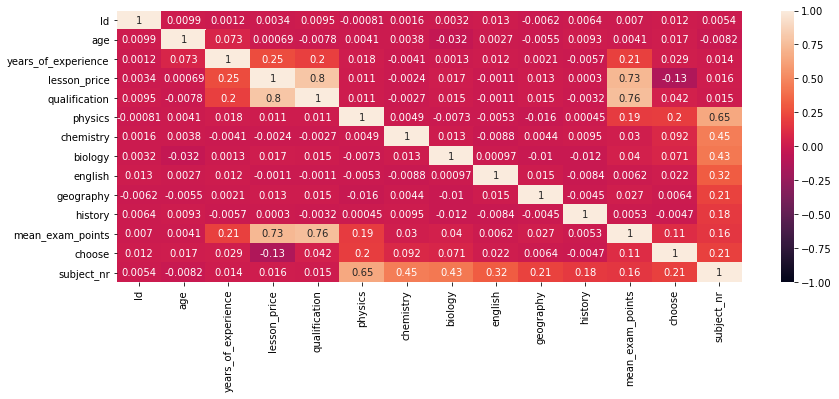

In [7]:
plt.figure(figsize=(14, 5))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

/Users/maximcucer/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject_nr', ylabel='mean_exam_points'>

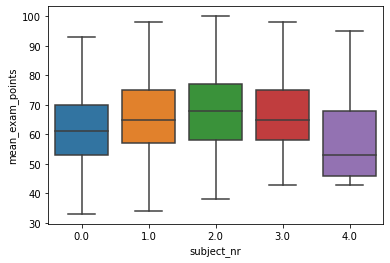

In [8]:
sns.boxplot(data['subject_nr'], data['mean_exam_points'])

In [9]:
data['choose'].value_counts() #Один класс сильно преоблпдает над другими

0    8891
1    1109
Name: choose, dtype: int64

Сбалансируем данные по классам

In [10]:
def balance_by_class(data, target_name, balancing_type='oversampling'):
    target_counts = data[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()
    
    if balancing_type == 'oversampling':
        
        disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

        for i in range(disbalance_coeff):
            sample = data[data[target_name] == minor_class_name].sample(target_counts[minor_class_name])
            data = data.append(sample, ignore_index=True)

        return data.sample(frac=1) 
    
    if balancing_type == 'undersampling':
        
        major_class_sample = data[data[target_name] == major_class_name].sample(target_counts[minor_class_name])
        minor_class_sample = data[data[target_name] == minor_class_name]
        
        data = pd.concat([major_class_sample, minor_class_sample], ignore_index=True)
        
        return data.sample(frac=1) 

In [11]:
data = balance_by_class(data, 'choose', balancing_type='oversampling')
    
data['choose'].value_counts()

0    8891
1    8872
Name: choose, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Id','choose'],axis=1), data.iloc[:,[-2]], test_size=0.2)

In [16]:
X_train.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,subject_nr
14929,33.0,3.0,2650.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,93.0,1.0
5597,59.0,1.0,2200.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,87.0,2.0
7901,57.0,2.0,1650.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1.0
11678,39.0,5.0,1450.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,70.0,1.0
17740,51.0,0.0,1700.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,72.0,2.0


Стандартизуем данные

In [98]:
def Standart(data):
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            data[i][j] = (data[i][j] - means[j])/stds[j]
    return data



Поменяем размерности для удобной работы

In [19]:
X_train = Standart(X_train.values)
X_test = Standart(X_test.values)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14210, 12), (3553, 12), (14210, 1), (3553, 1))

In [20]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12, 14210), (12, 3553), (1, 14210), (1, 3553))

In [22]:
y_train

,14929,5597,7901,11678,17740,16797,10993,12000,1965,10564,...,8591,11408,3196,17570,9118,11670,2826,9409,47,793
choose,1,1,0,1,1,1,1,1,0,1,...,0,1,0,1,1,1,0,0,0,0


Напишем класс логистического классификатора

In [56]:
class LogisticClassifier:
    def __init__(self, n_iterations=1000, eta=0.05):
        self.n_iterations = n_iterations
        self.eta = eta
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    def get_grad(self, w, c, X, target):
        m = X.shape[1]
        y = np.array(2 * target - 1).flatten() #избавимся от нулей
        score = np.array(np.dot(w.T, X)).flatten()
        Z = -y / (m * (1 + np.exp(y * score)))
        grad = Z[np.newaxis, :].dot(X.T)
        return grad, np.sum(Z)

    def optimize(self, w, c, X, y, get_w=False):
        for i in range(self.n_iterations):        
            grad_w, grad_c = self.get_grad(w, c, X, y)
            w = w - self.eta * grad_w.T
            c = c - self.eta * grad_c
        self.w = w
        self.c = c
        if get_w:
            return w, c
    
    def new_weigths(self, lenght):
        self.w = np.zeros((lenght, 1))
        self.c = 0
        return self.w, self.c
    
    def predict_proba(self, X):
        y_predicted = self.sigmoid(np.dot(self.w.T, X) + self.c)  
        return y_predicted.flatten()
    
    def predict(self, X):
        y_predicted = self.predict_proba(X)
        for i in range(X.shape[1]):
            if (y_predicted[i] > 0.5): 
                y_predicted[i] = 1
            elif (y_predicted[i] <= 0.5):
                y_predicted[i] = 0
    
        return y_predicted.flatten()

In [195]:
clf = LogisticClassifier(n_iterations=10000, eta=0.001)

In [196]:
clf.optimize(clf.new_weigths(X_train.shape[0])[0],\
             clf.new_weigths(X_train.shape[0])[1], X_train, y_train)

In [197]:
y_train_pred_prob = clf.predict_proba(X_train)

In [198]:
y_train_pred_prob

array([0.60308133, 0.78241143, 0.22422036, ..., 0.61430787, 0.22136102,
       0.64835367])

In [199]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [200]:
y_test_pred

array([1., 1., 1., ..., 0., 0., 0.])

In [201]:
y_train = np.array(y_train).flatten()
y_test = np.array(y_test).flatten()
y_train

array([1, 1, 0, ..., 0, 0, 0])

In [202]:
def confusion_matrix(y_true, y_pred):
    TP = np.sum(np.logical_and(y_pred==1, y_true==1))
    FP = np.sum(np.logical_and(y_pred==1, y_true==0))
    FN = np.sum(np.logical_and(y_pred==0, y_true==1))
    TN = np.sum(np.logical_and(y_pred==0, y_true==0))
    return np.array([[TP,FP],[FN, TN]])

In [203]:
confusion_matrix(y_test, y_test_pred)

array([[1357,  482],
       [ 435, 1279]])

In [204]:
def accuracy(y_true, y_pred):
    TP = confusion_matrix(y_true, y_pred)[0][0]
    FP = confusion_matrix(y_true, y_pred)[0][1]
    FN = confusion_matrix(y_true, y_pred)[1][0]
    TN = confusion_matrix(y_true, y_pred)[1][1]
    return (TP+TN)/(TP+FP+FN+TN)

In [205]:
accuracy(y_test, y_test_pred)

0.7419082465522094

In [206]:
def f1(y_true, y_pred):
    TP = confusion_matrix(y_true, y_pred)[0][0]
    FP = confusion_matrix(y_true, y_pred)[0][1]
    FN = confusion_matrix(y_true, y_pred)[1][0]
    TN = confusion_matrix(y_true, y_pred)[1][1]
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    F1 = 2*(precision*recall)/(precision+recall)
    return precision, recall, F1

In [207]:
precision = f1(y_test, y_test_pred)[0]
precision

0.7379010331702012

In [208]:
recall = f1(y_test, y_test_pred)[1]
recall

0.7572544642857143

In [209]:
f1 = f1(y_test, y_test_pred)[0]
f1

0.7379010331702012

Обучим модель на всех данных

In [221]:
X = data.drop(columns=['Id','choose'])
X = Standart(X.values).T
X.shape

(12, 17763)

In [222]:
y = np.array(data.choose)
y

array([1, 0, 1, ..., 1, 0, 0])

In [227]:
clf1 = LogisticClassifier(n_iterations=1000, eta=0.05)

In [228]:
clf1.optimize(clf.new_weigths(X.shape[0])[0],\
             clf.new_weigths(X.shape[0])[1], X, y)

In [246]:
test = pd.read_csv('test.csv')
test['subject_nr'] = test['physics'] + test['chemistry'] + test['biology']\
                        + test['english'] + test['geography'] + test['history']

In [247]:
indexes = test['Id']

In [248]:
test = test.drop(columns='Id')

In [249]:
test = Standart(test.values)

In [250]:
y_final_pred = clf1.predict_proba(test.T)

In [251]:
y_final_pred

array([0.24872652, 0.82086592, 0.21957262, ..., 0.86903447, 0.98231383,
       0.46645259])

In [252]:
submis = pd.concat([indexes, pd.Series(y_final_pred)], axis = 1)
submis = submis.rename(columns = {0 : 'choose'})

In [253]:
submis.to_csv('best_tutor_predict.csv', index=None)

На Kaggle score = 0.85413, 14 место